# Lesson 06
## Analysis Module within ArcPy

# Objectives

- Examine the Analysis Tools
- Examine the Feature Analysis Tools
- Learn about the `tempfile` module


## Analysis Toolbox

- Collection of tools that perform the most fundamental GIS operations
-  Five toolsets
    + Extract
    + Overlay
    + Pairwise Overlay
    + Proximity
    + Statistics


### Analysis Toolbox Example

- Here we need to split the center road line by each district

In [11]:
import os
import arcpy
from arcpy import env
from arcpy import da

env.overwriteOutput = True
results = []
cnt_lines = "./data/Centerlines.shp"

with da.SearchCursor("./data/School_Districts.shp", "SHAPE@") as srows:
    for idx, row in enumerate(srows):
        out_fc = os.path.join(env.scratchGDB, f"road_line_{idx}")
        geom = row[0]
        out_fc = arcpy.analysis.Clip(cnt_lines, geom, out_feature_class=out_fc)[0]
        results.append(out_fc)
results

['C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_0',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_1',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_2',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_3',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_4',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_5',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_6',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_7',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_8',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_9',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_10',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb\\road_line_11']

### Example Notes:

- Mixed cursor with standard tools
- Used geometry as input to tools

# The `tempfile` Module

In [12]:
import tempfile

**Purpose:** Create temporary file system objects such as files and directories

## Why Use `tempfile`?

1. Creating temporary files with unique names
2. Helps prevent the theft of data
3. Built in secure file generation
4. Automatic file deletion when process finishes

## Temporary Files

- Used with non-persistent files that are not shared between applications
- Files have no true name/extension

In [14]:
with tempfile.TemporaryFile() as temp:
    print('temp:')
    print('  {!r}'.format(temp))
    print('temp.name:')
    print('  {!r}'.format(temp.name))

temp:
temp.name:
  'C:\\Users\\lando\\AppData\\Local\\Temp\\tmpjjiy6lzj'


## Temporary Files Continued

- There is the ability to read/write data into the temporary file
    + Defaults into `w+b`

In [16]:
with tempfile.TemporaryFile() as temp:
    temp.write(b'Python is so Amazing') # notice the b for bytes
    temp.seek(0) # rewind to the start of the file
    print(temp.read()) # read the file

b'Python is so Amazing'


## Temporary Files Continued

- Allows for the usage of other write modes.

In [19]:
with tempfile.TemporaryFile(mode='w+t') as writer: # text data writer 
    writer.writelines(['**Shopping List**\n','Bread\n', 'Eggs\n', 'Milk\n'])
    writer.seek(0)
    for line in writer:
        print(line)

**Shopping List**

Bread

Eggs

Milk



## Named Temporary Files

- Create temporary files that can be shared during the context of that process

In [27]:
import pathlib
with tempfile.NamedTemporaryFile() as temp:
    print('temp:')
    print('  {0}'.format(temp))
    print('temp.name:')
    print('  {0}'.format(temp.name))

    f = pathlib.Path(temp.name)
f"Do I Exist Anymore? {f.exists()}"

temp:
temp.name:
  C:\Users\lando\AppData\Local\Temp\tmpcr_h09yf


'Do I Exist Anymore? False'

## Predicted Named Temporary Files

- Sometimes a file extension, prefix, or suffix is needed for a given temporary file


In [35]:
with tempfile.NamedTemporaryFile(suffix='.txt',
                                 prefix='adv_python_') as temp:
    print('temp:')
    print('  ', temp)
    print('temp.name:')
    print('  ', temp.name)

temp:
temp.name:
   C:\Users\lando\AppData\Local\Temp\adv_python_3_1gr_66.txt


## Temporary Directories

- There are built in commands to access the OS' temporary folder location
- `ArcPy` has temporary storage locations just like `tempfile`

In [41]:
print('gettempdir():', tempfile.gettempdir())
print('gettempprefix():', tempfile.gettempprefix())

gettempdir(): C:\Users\lando\AppData\Local\Temp
gettempprefix(): tmp


In [43]:
env.scratchFolder, env.scratchGDB

('C:\\Users\\lando\\AppData\\Local\\Temp\\scratch',
 'C:\\Users\\lando\\AppData\\Local\\Temp\\scratch.gdb')

## Building Temporary Directories

- Sometimes a temporary sub-folder is needed to store information for one piece the process
    + Think downloading information

In [40]:
pth = None
with tempfile.TemporaryDirectory(suffix='_storage',
                                 prefix='adv_python_') as temp:
    print(f'temp folder: {temp}')
    pth = os.path.join(temp, "test.txt")
    with open(pth, 'w') as writer:
        writer.write('hello there!')
    print("DO I EXIST: ", os.path.isfile(pth))
print("DO I EXIST: ", os.path.isfile(pth))
    

temp folder: C:\Users\lando\AppData\Local\Temp\adv_python__cy25802_storage
DO I EXIST:  True
DO I EXIST:  False


## Recall out original example

In [ ]:
import os
import arcpy
from arcpy import env
from arcpy import da

env.overwriteOutput = True

results = []
cnt_lines = "./data/Centerlines.shp"

with da.SearchCursor("./data/School_Districts.shp", "SHAPE@") as srows:
    for idx, row in enumerate(srows):
        out_fc = os.path.join(env.scratchGDB, f"road_line_{idx}")
        geom = row[0]
        out_fc = arcpy.analysis.Clip(cnt_lines, geom, out_feature_class=out_fc)[0]
        results.append(out_fc)
results

- Notice we manually set unique feature class names.

## Enhancements to Analysis

- Leverage `CreateUniqueNames`
- Use `tempfile` to generate folders and intermediate files
- Leverage scratch GDB, scratch folders and in_memory workspaces

In [ ]:
import os
import arcpy
import pandas as pd
from arcpy import env
from arcpy import da

env.overwriteOutput = True
dfs = []
results = []
cnt_lines = "./data/Centerlines.shp"

with da.SearchCursor("./data/School_Districts.shp", ["SHAPE@", 'NAME_']) as srows:
    
    for idx, row in enumerate(srows):
        out_fc = arcpy.CreateUniqueName(os.path.join(env.scratchGDB, "road_line"))
        geom = row[0]
        road_lines = arcpy.analysis.Clip(cnt_lines, geom, out_feature_class=out_fc)[0]
        arcpy.management.AddFields(road_lines, "LENGTH_MI FLOAT # # # #;POINTS LONG # # # #")
        arcpy.management.CalculateGeometryAttributes(road_lines, [["length_mi", "LENGTH_GEODESIC"], 
                                                                  ["points", "POINT_COUNT"]], "MILES_US")
        with da.SearchCursor(road_lines, "*") as rows:
            flds = rows.fields
            for r in rows:
                r = dict(zip(flds, r))
                r['SCHOOL_DISTICT'] = row[1]
                results.append(r)
                del r
            del rows
        del idx, row

## Examine Number of Roads in Each District

In [ ]:
df = pd.DataFrame(results)

In [85]:
import numpy as np
from matplotlib import cm

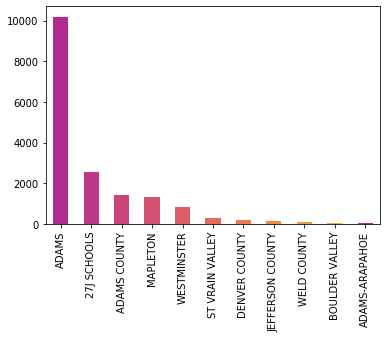

In [84]:
color = cm.plasma(np.linspace(.4,.8, 10))
df.SCHOOL_DISTICT.value_counts().plot(kind='bar', color=color)

In [60]:
with da.SearchCursor(results[0], "*") as rows:
    print(rows.fields)
    for row in rows:
        print(row)
        break

('OBJECTID_1', 'Shape', 'OBJECTID', 'SEGM_ID', 'PREFIX', 'NAME', 'TYPE', 'SUFFIX', 'STREET_ID_', 'ST_ID', 'LEFT_FROM_', 'RIGHT_FROM', 'LEFT_TO_AD', 'RIGHT_TO_A', 'NO_ADDR', 'ADDRTYPE', 'ONE_WAY', 'ESN_LEFT', 'ESN_RIGHT', 'JURISDICTI', 'JURISDIC_1', 'AREAL', 'FUNCLASS', 'SURFACE_TY', 'OP_STATUS', 'ACCEPTED', 'NO_LANES', 'DATE_CREAT', 'DATE_CHANG', 'FUNCTION_C', 'FUNCTION_N', 'NOTES', 'SYMBOL', 'SPEED_LIMI', 'COMPKEY', 'COMPTYPE', 'GlobalID', 'ShapeSTLen', 'Shape_Length', 'LENGTH_MI', 'POINTS')
(1, (-105.15157528012503, 39.8017530908825), 1702, 16075, 'W', '58TH', 'AVE', ' ', 'W 58TH AVE', 'W 58th Ave', 0, 0, 0, 0, 'Outside City', 0, 'NO', 0, 0, 'JEFFERSON COUNTY', 'JEFFERSON COUNTY', ' ', 'COLLECTOR (NOT IN CITY)', 'PAVED', 'BUILT', ' ', 0, ' ', ' ', ' ', ' ', ' ', '-9', 45, 0, 68, '{6F7ED985-7EAE-4B0E-AF3A-1BFD51CBB974}', 7649.305627631393, 0.02722377903339362, 1.4487168788909912, 2)
